<a href="https://colab.research.google.com/github/pschwartz222/MA-576/blob/main/Gradient_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import eig
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sympy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sympy import diff, symbols
import pylab
import math
from sympy import cos, sin, exp, Matrix

In [ ]:
tol = 10**(-5)

Q = np.array([[1, 0], [0, 8]])

b = np.array([[0], [0]])

c = 0

In [ ]:
def f(x, Q, b, c):
  return(x.T @ Q @ x + 2*(b.T @ x)+c)

In [ ]:
def f_1(x,y):
  return(x**2 + 8*y**2)

In [ ]:
def grad(x,Q,b):
  return(2*((Q @ x)+ b ))

In [ ]:
x = np.array([[2, 1]]).T

In [ ]:
def grad_dec_line_search(x, Q, b, c, tol): #performs exact line search descent on quadratic functions

  X = [x[0,0]]
  Y = [x[1,0]]

  err = math.inf

  d = - grad(x, Q, b)

  it = 0

  while err > tol:
    a = -(grad(x, Q, b).T @ d)/(2*(d.T @ Q @ d))
    x = x + a*d
    err = LA.norm(grad(x, Q, b))
    d = -grad(x, Q, b)
    it = it + 1
    X.append(x[0,0])
    Y.append(x[1,0])

  print('Number of iterations =', it)
  print('Approximate solution x* =', x.T)
  print('||x*|| =', LA.norm(x))
  print('f(x) =', f(x,Q,b,c))
  print()

  return(x, X, Y)

In [ ]:
x_star1, X_1, Y_1 = grad_dec_line_search(x, Q, b, c, tol)

Number of iterations = 21
Approximate solution x* = [[ 1.88282265e-06 -5.88382079e-08]]
||x*|| = 1.8837417753649582e-06
f(x) = [[3.57271662e-12]]



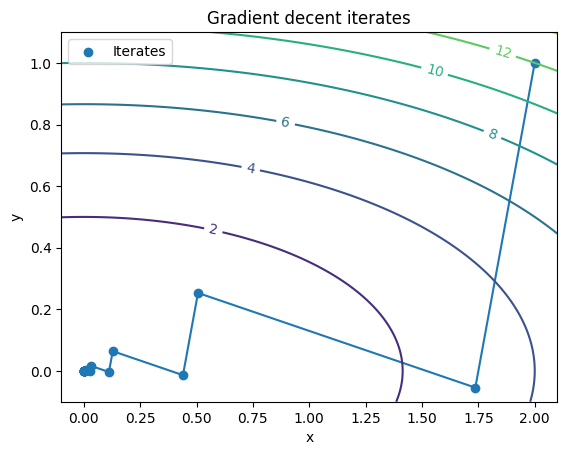

In [ ]:
X, Y = np.meshgrid(np.linspace(-.1, 2.1, 200), np.linspace(-.1, 1.1, 200))

Z = f_1(X, Y)

plt.scatter(X_1, Y_1, label='Iterates')
plt.plot(X_1,Y_1)
contours = plt.contour(X, Y , Z)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient decent iterates')
plt.legend()
plt.show()




In [ ]:
x_star0, X_0, Y_0 = grad_dec_line_search(x, np.identity(2), b, c, tol)

Number of iterations = 1
Approximate solution x* = [[0. 0.]]
||x*|| = 0.0
f(x) = [[0.]]



In [ ]:
def grad_dec_const(x, Q, b, c, tol, alpha):
  X = [x[0,0]]
  Y = [x[1,0]]

  err = math.inf

  d = - grad(x, Q, b)

  it = 0

  while err > tol:
    x = x + alpha*d
    err = LA.norm(grad(x, Q, b))
    d = -grad(x, Q, b)
    it = it + 1
    X.append(x[0,0])
    Y.append(x[1,0])

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x.T)
  print('||x*|| =', LA.norm(x))
  print('f(x) =', f(x,Q,b,c))
  print()

  return(x, X, Y)

In [ ]:
x_star2, X_2, Y_2 = grad_dec_const(x, Q, b, c, tol, .1)

Number of iterations = 58
Approximate solution: x* = [[4.78904857e-06 1.35760217e-13]]
||x*|| = 4.789048565205906e-06
f(x) = [[2.29349862e-11]]



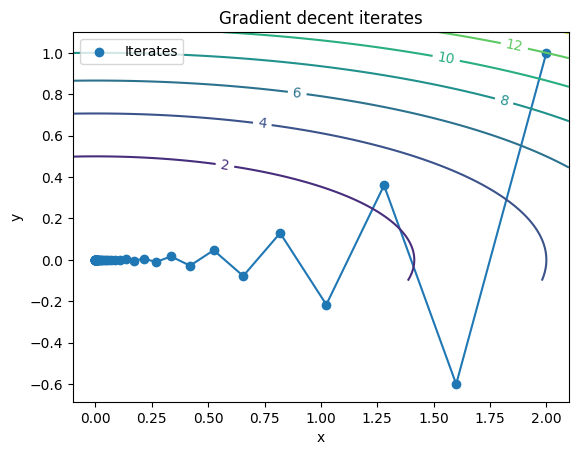

In [ ]:
plt.scatter(X_2, Y_2, label='Iterates')
plt.plot(X_2,Y_2)
contours = plt.contour(X, Y , Z)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient decent iterates')
plt.legend()
plt.show()

In [ ]:
def grad_dec_Armijo(x, Q, b, c, tol, s, sigma, beta):
  X = [x[0,0]]
  Y = [x[1,0]]

  err = math.inf

  d = - grad(x, Q, b)

  g = - d

  it = 0

  while err > tol:
    a = s
    while f(x, Q, b, c) - f(x+a*d, Q, b, c) < - sigma*a*(g.T @ d):
      a = a*beta #this decreases the step size until the condition above is not true.
    x = x + a*d
    err = LA.norm(grad(x, Q, b))
    d = -grad(x, Q, b)
    g = - d
    it = it + 1
    X.append(x[0,0])
    Y.append(x[1,0])

  print('Number of iterations =', it)
  print('Approximate solution x* =', x.T)
  print('||x*|| =', LA.norm(x))
  print('f(x) =', f(x,Q,b,c))
  print()

  return(x, X, Y)

In [ ]:
x_star3, X_3, Y_3 = grad_dec_Armijo(x, Q, b, c, tol, 2, .25, .5)

Number of iterations = 2
Approximate solution x* = [[0. 0.]]
||x*|| = 0.0
f(x) = [[0.]]



In [ ]:
Q_2 = np.array([[1, 0], [0, 1/1000]])

In [ ]:
x_1 = np.array([[1/1000, 1]]).T
s = 2
sigma = 1/4
beta = 1/2

In [ ]:
x_star4, X_4, Y_4 = grad_dec_Armijo(x_1, Q_2, b, c, tol, s, sigma, beta)

Number of iterations = 1461
Approximate solution x* = [[0.         0.00498632]]
||x*|| = 0.0049863226197376905
f(x) = [[2.48634133e-08]]



In [ ]:
x_star5, X_5, Y_5 = grad_dec_const(x_1, Q_2, b, c, tol, .1)

Number of iterations = 26489
Approximate solution: x* = [[9.88131292e-324 4.99993758e-003]]
||x*|| = 0.004999937579890128
f(x) = [[2.49993758e-08]]



In [ ]:
print(np.array([[X_1[0], Y_1[0]]]).T)

[[2]
 [1]]


In [ ]:
def log_plot_iterates(X, Y, Q, b, c):
  n = len(X)
  N = []
  F = []
  for i in range(n):
    v = np.array([[X[i], Y[i]]]).T
    N.append(LA.norm(v))
    F.append(f(v, Q, b, c))

  #plot norm of iterates
  plt.scatter(np.arange(0, n), N, label = 'Iterates')
  plt.yscale("log")
  plt.xlabel("k")
  plt.ylabel("||x_k|| (log scale)")
  plt.title("Gradient decent of f(x,y)")
  plt.legend()
  plt.show()


  #plot function value of iterates
  plt.scatter(np.arange(0, n), F, label = 'Iterates')
  plt.yscale("log")
  plt.xlabel("k")
  plt.ylabel("f(x_k) (log scale)")
  plt.title("Gradient decent of f(x,y)")
  plt.legend()
  plt.show()

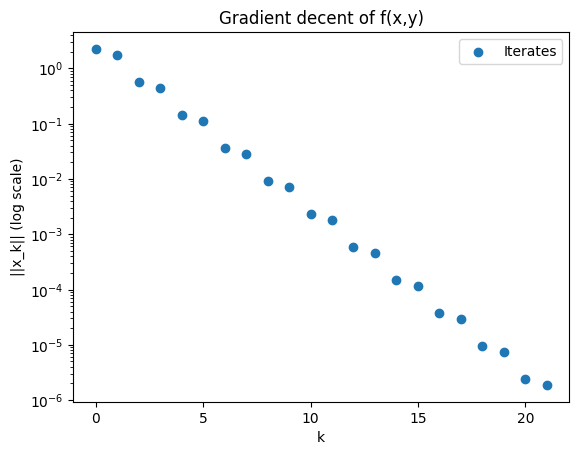

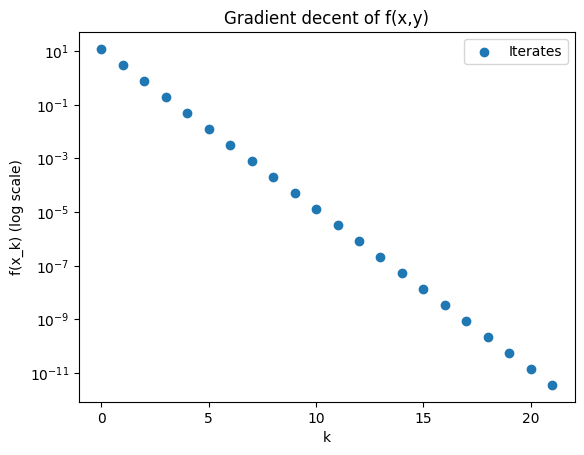

In [ ]:
log_plot_iterates(X_1, Y_1, Q, b, c)

In [ ]:
Q_3 = np.array([[1, 0], [0, 1/10]])
x_2 = np.array([[1/10, 1]]).T

In [ ]:
x_star6, X_6, Y_6 = grad_dec_Armijo(x_2, Q_3, b, c, tol, s, sigma, beta)

Number of iterations = 22
Approximate solution x* = [[0.0000000e+00 4.6798828e-05]]
||x*|| = 4.679882803280607e-05
f(x) = [[2.19013031e-10]]



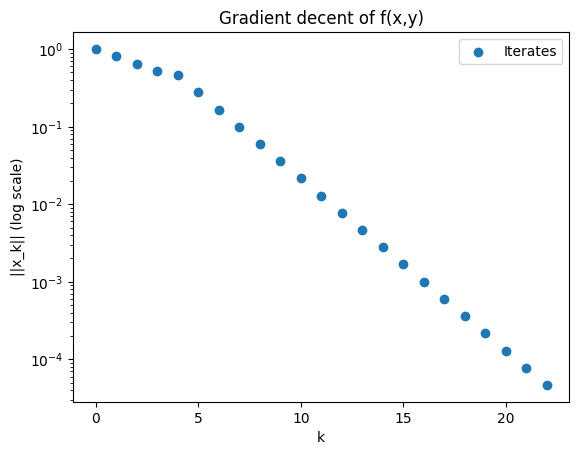

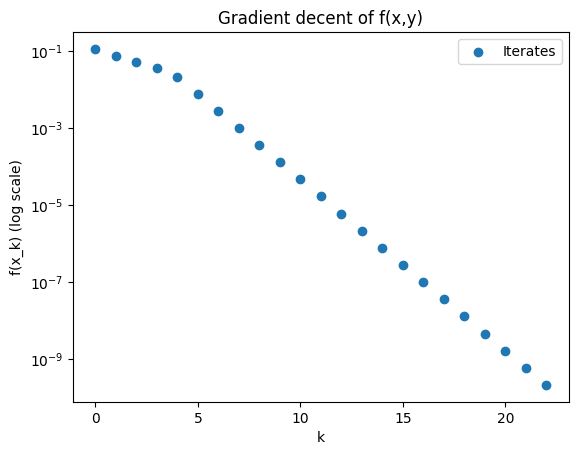

In [ ]:
log_plot_iterates(X_6, Y_6, Q_3, b, c)

Let's examine the condition number lambda_max(A)/lambda_min(A)

In [ ]:
A = np.array([[1+10**(-4), 1], [1, 1+10**(-4)]])

v, P = LA.eig(A)

print(A)
print(v)

[[1.0001 1.    ]
 [1.     1.0001]]
[2.0001e+00 1.0000e-04]


In [ ]:
lambda_min = min(v)
lambda_max = max(v)

kappa_A = lambda_max/lambda_min

print(f'condition number k(A) = {kappa_A: .4f}')

condition number k(A) =  20001.0000


In [ ]:
b_0 = np.array([1, 1]).T
b_1 = np.array([1.1, 1]).T

norm_b0 = LA.norm(b_0)
norm_b1 = LA.norm(b_1)

x_0 = LA.inv(A) @ b_0 #solves Ax = b
x_1 = LA.inv(A) @ b_1 #solves Ax = b_1

norm_x0 = LA.norm(x_0)
norm_x1 = LA.norm(x_1)

print('x_0 =', x_0.T)
print()
print('x_1 =', x_1.T)
print()

m = LA.norm(x_1-x_0)/norm_x0
M = kappa_A*(LA.norm(b_1-b_0)/norm_x0)

print(f'||x_1 - x_0||/||x_0|| = {m: .4f}')
print()
print(f'k(A)||b_1 - b_0||/||b_0|| = {M: .4f}')
print()
print('||x_1 - x_0||/||x_0|| <= k(A)||b_1 - b_0||/||b_0||', m <= M)
print()

x_0 = [0.499975 0.499975]

x_1 = [ 500.52497375 -499.47502625]

||x_1 - x_0||/||x_0|| =  1000.0500

k(A)||b_1 - b_0||/||b_0|| =  2828.7100

||x_1 - x_0||/||x_0|| <= k(A)||b_1 - b_0||/||b_0|| True



In [ ]:
print(LA.norm(LA.inv(A)))
print(1/lambda_min)


10000.000012498469
10000.0000000011


In [ ]:
def grad_dec_scaled(x, Q, b, c, tol):
  D = np.zeros((2,2))
  D[0,0] = 1/Q[0,0]
  D[1,1] = 1/Q[1,1]

  X = [x[0,0]]
  Y = [x[1,0]]

  err = math.inf

  d = -D @ grad(x, Q, b)

  it = 0

  while err > tol:
    a = -(grad(x, Q, b).T @ d)/(2*(d.T @ Q @ d))
    x = x + a*d
    err = LA.norm(np.sqrt(D) @ grad(x, Q, b))
    d = -D @ grad(x, Q, b)
    it = it + 1
    X.append(x[0,0])
    Y.append(x[1,0])

  print('Number of iterations =', it)
  print('Approximate solution x* =', x.T)
  print('||x*|| =', LA.norm(x))
  print('f(x) =', f(x,Q,b,c))
  print()

  return(x, X, Y)


In [ ]:
Q = np.array([[1000, 20], [20, 1]])
b = np.zeros((2,1))
c = 0
tol = 10**(-5)

In [ ]:
x_0scale = np.array([[1, 100]]).T
x_scale_star, X_scale, Y_scale = grad_dec_scaled(x_0scale, Q, b, c, tol)

Number of iterations = 11
Approximate solution x* = [[-4.06087124e-08  1.21826137e-06]]
||x*|| = 1.218937994660963e-06
f(x) = [[1.15434726e-12]]



In [ ]:
x_ex_star, X_ex, Y_ex = grad_dec_line_search(x_0scale, Q, b, c, tol)

Number of iterations = 37
Approximate solution x* = [[-1.31626561e-07  6.57344621e-06]]
||x*|| = 6.574763921756798e-06
f(x) = [[2.59261419e-11]]



In [ ]:
x_arm_star, X_arm, Y_arm = grad_dec_Armijo(x_0scale, Q, b, c, tol, 2, .25, .5)

Number of iterations = 810
Approximate solution x* = [[-1.56614765e-07  7.76456904e-06]]
||x*|| = 7.766148372905904e-06
f(x) = [[3.61748708e-11]]



In [ ]:
def grad_dec_Armijo_scale(x, Q, b, c, tol, s, sigma, beta):
  X = [x[0,0]]
  Y = [x[1,0]]

  D = np.zeros((2,2))
  D[0,0] = 1/Q[0,0]
  D[1,1] = 1/Q[1,1]

  err = math.inf

  d = -D @ grad(x, Q, b)

  g = - d

  it = 0

  while err > tol:
    a = s
    while f(x, Q, b, c) - f(x+a*d, Q, b, c) < - sigma*a*(g.T @ d):
      a = a*beta
    x = x + a*d
    err = LA.norm(np.sqrt(D) @ grad(x, Q, b))
    d = -D @ grad(x, Q, b)
    g = - d
    it = it + 1
    X.append(x[0,0])
    Y.append(x[1,0])

  print('Number of iterations =', it)
  print('Approximate solution x* =', x.T)
  print('||x*|| =', LA.norm(x))
  print('f(x) =', f(x,Q,b,c))
  print()

  return(x, X, Y)

In [ ]:
x_arm_scale_star, X_arm_scale, Y_arm_scale = grad_dec_Armijo_scale(x_0scale, Q, b, c, tol, 2, .25, .5)

Number of iterations = 38
Approximate solution x* = [[2.74877907e-08 2.74877907e-06]]
||x*|| = 2.748916504957672e-06
f(x) = [[1.13336796e-11]]



In [ ]:
x_arm_scale_star, X_arm_scale, Y_arm_scale = grad_dec_Armijo_scale(x_0scale, Q, b, c, tol, 10, .25, .5)

Number of iterations = 13
Approximate solution x* = [[-5.21540642e-08  1.49011612e-06]]
||x*|| = 1.491028536165772e-06
f(x) = [[1.83186799e-12]]

